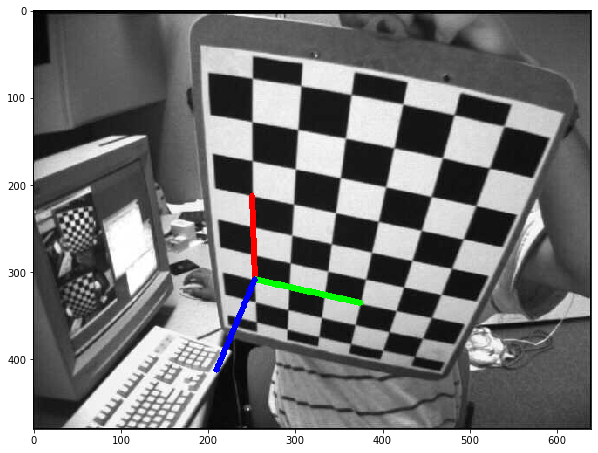

In [17]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt 


# 加载标定参数
with np.load('B.npz') as X:
    mtx, dist, _, _ = [X[i] for i in ('mtx','dist','rvecs','tvecs')]

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)


img = cv.imread("./chess_board_images/left02.jpg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, corners = cv.findChessboardCorners(gray,(7,6))
corners2 = cv.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
ret, rvecs, tvecs = cv.solvePnP(objp, corners2, mtx, dist)
# 3D点变换到图像点
imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, mtx, dist)

# 原点
corner = tuple(corners2[0].ravel())
corner = np.array(corner,dtype=int)
imgpts = np.array(imgpts,dtype=int)
img_c = np.copy(img)
cv.line(img_c, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
cv.line(img_c, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
cv.line(img_c, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)

plt.figure(figsize=(10,10))
plt.imshow(img_c)
plt.show()